## Motional Sidebands

Now that we can probe a narrow transition with the 1762 nm laser, we need to determine what our spectra will look like. We know that our weak trap frequencies will lead to a higher average number of phonons, likely starting us well outside the Lamb-Dicke regime after Doppler cooling. In addition, if the ion is displaced from the null, excess micromotion can drastically increase the temperature. The question becomes how much our carrier transitions is depleted, and what does our phonon distribuition look like. First lets estimate the temperature based on ion size from the camera, as well as the Doppler cooling limit.


Following Berkeland 1998, the kinetic energy along the $i$-th direction is given by:

$\Large E_{Ki} \approx \frac{1}{4}mu^2_{1i}(\omega^2_i + \frac{1}{8}q^2_i\Omega^2_{\mathrm{rf}}) + \frac{4}{m}\left(\frac{Qq_iE_{dc}\cdot\hat{u_i}}{(2a_i + q^2_i)\Omega_{\mathrm{rf}}}\right)^2$

or:

$\Large E_{Ki} \approx \frac{1}{4}m \omega^2_iu^2_{1i} \left(1 + \frac{q^2_i}{q^2_i + 2a_i}\right) + 2m\omega^2_iu^2_{0i}$

The first term is comes from the secular motion with secular amplitude $u_{1i}$, the second from intrinsic micromotion, and the third from excess micromotion due to stray DC electric fields, displacing the ion $u_{0i}$ from the null. Since there is no micromotion in the axial (z) direction, stray fields in that direction only cause a displacement of the secular motion. Since secular motion can be reduced via Doppler cooling, the psuedo temperature of all three modes should be near the Doppler cooling limit. However, excess micromotion in the radial direction can cause orders of magnitude increase in the temperature.

Doppler temp : 480 uK
Radial temp : 55.7 mK
Axial temp : 6.2 mK


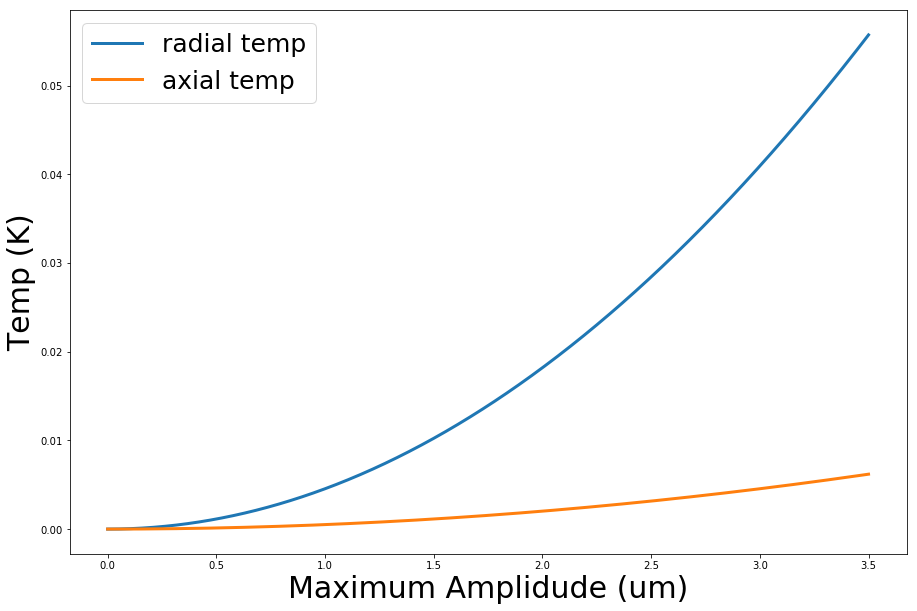

In [1]:
from pylab import *
rcParams['text.usetex'] = False
rcParams['figure.figsize'] = 15,10
## Plot temp vs position on the camera
omega_r = 2*np.pi*120e3
omega_z = omega_r/3.
kb = 1.38e-23
m = 133*1.66e-27
hbar = 1.0545e-34
r = np.linspace(0,3.5e-6,1000)
T_r = m*r**2*omega_r**2/kb/2
T_z = m*r**2*omega_z**2/kb/2
gamma_493 = 2*np.pi*20e6
T_D = hbar*gamma_493/2/kb
print 'Doppler temp :', '{:.0f}'.format(T_D*1e6), 'uK'


plot(r*1e6,T_r, linewidth = 3, label = 'radial temp')
plot(r*1e6,T_z, linewidth = 3, label = 'axial temp')
#plt.tick_params(labelsize = 30)
#tick_params(width=5, length=10)
plt.ylabel('Temp (K)', fontsize = 30)
plt.xlabel(r'Maximum Amplidude (um)', fontsize = 30)
plt.legend(fontsize = 25)
print 'Radial temp :', '{:.1f}'.format(T_r[-1]*1e3), 'mK'
print 'Axial temp :', '{:.1f}'.format(T_z[-1]*1e3), 'mK'
T_r = T_r[-1]
T_z = T_z[-1]
show()

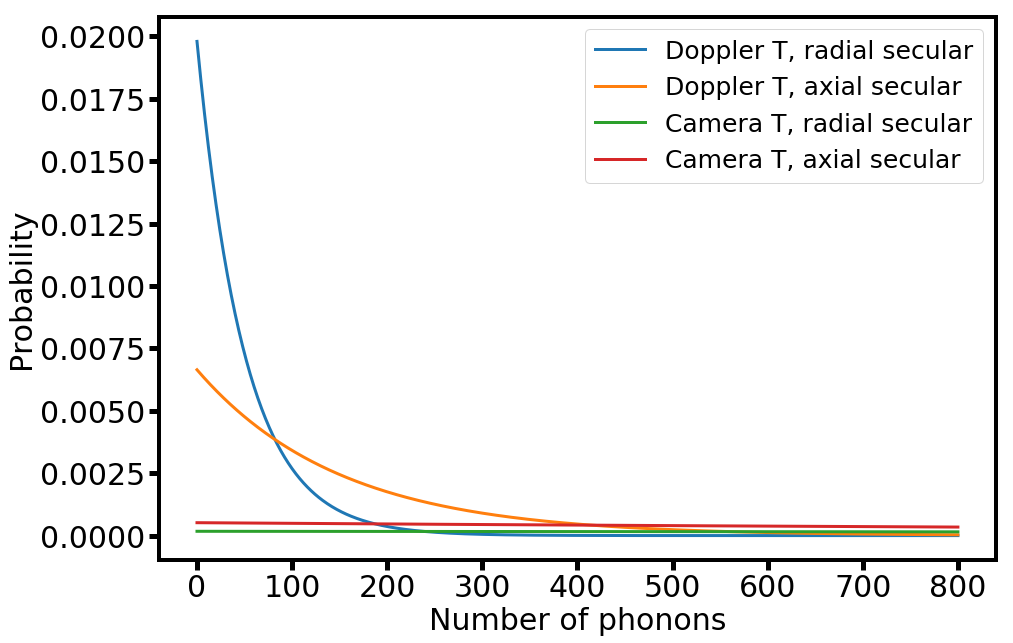

In [4]:
### plot our phonon distribution
lam = 493.e-9
hbar = 1.0542405e-34
m = 133*1.66054e-27
kb = 1.38064852e-23
omega_r = 2*np.pi*200e3
omega_z = omega_r/3.
n = np.linspace(0,800,801)


#print 'Doppler temp (mK):', '{:.3f}'.format(T_D*1e3)
#print 'Radial temp (mK):', '{:.1f}'.format(T_r*1e3)
#print 'Axial temp (mK):', '{:.1f}'.format(T_z*1e3)

# partition functions
Z_D_r = 1./(1-np.exp(-hbar*omega_r/kb/T_D))
Z_D_z = 1./(1-np.exp(-hbar*omega_z/kb/T_D))
Z_r = 1./(1-np.exp(-hbar*omega_r/kb/T_r))
Z_z = 1./(1-np.exp(-hbar*omega_z/kb/T_z))

# phonon probabilities
P_D = np.exp(-n*hbar*omega_r/kb/T_D)/Z_D_r
P_D_z = np.exp(-n*hbar*omega_z/kb/T_D)/Z_D_z
P_r = np.exp(-n*hbar*omega_r/kb/T_r)/Z_r
P_z = np.exp(-n*hbar*omega_z/kb/T_z)/Z_z

plot(n,P_D, linewidth = 3, label = 'Doppler T, radial secular')
plot(n,P_D_z, linewidth = 3, label = 'Doppler T, axial secular')
plot(n,P_r, linewidth = 3, label = 'Camera T, radial secular')
plot(n,P_z, linewidth = 3, label = 'Camera T, axial secular')

tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlabel('Number of phonons', fontsize = 30)
ylabel('Probability', fontsize = 30)
legend(fontsize = 25)
#xlim([700,800])
show()


Nbar Doppler radial : 49.5
Nbar Doppler axial : 99.5
Nbar radial : 5803.6
Nbar axial : 1289.3
Lamb-Dicke paramter radial : 0.049
Lamb-Dicke limit radial : 28.039
Lamb-Dicke paramter axial : 0.070
Lamb-Dicke limit axial : 12.462


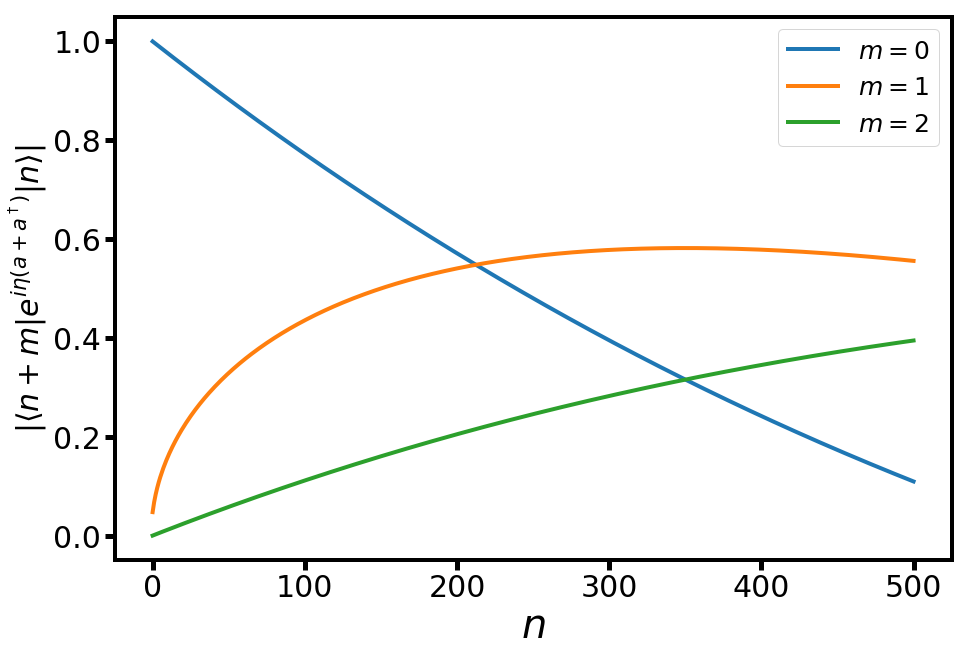

In [3]:
from scipy.special import assoc_laguerre as lag
from scipy.special import factorial
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

lam = 1762.e-9
hbar = 1.054e-34
k = 2*np.pi/lam
m = 133*1.66e-27
kb = 1.38e-23
omega_r = 2*np.pi*200e3
omega_z = omega_r/2.
gamma_493 = 2*np.pi*20e6

T_D = hbar*gamma_493/2/kb

#print 'Doppler temp (mK):', '{:.3e}'.format(T_D*1e3)

nbar_D_r= 1./(np.exp(hbar*omega_r/kb/T_D) -1 )
nbar_D_z= 1./(np.exp(hbar*omega_z/kb/T_D) -1 )
nbar_r = 1./(np.exp(hbar*omega_r/kb/T_r) -1 )
nbar_z = 1./(np.exp(hbar*omega_z/kb/T_z) -1 )

print 'Nbar Doppler radial :', '{:.1f}'.format(nbar_D_r)
print 'Nbar Doppler axial :', '{:.1f}'.format(nbar_D_z)
print 'Nbar radial :', '{:.1f}'.format(nbar_r)
print 'Nbar axial :', '{:.1f}'.format(nbar_z)


eta_r = k*np.sqrt(hbar/2/m/omega_r)
eta_z = k*np.sqrt(hbar/2/m/omega_z)

print r'Lamb-Dicke paramter radial :', '{:.3f}'.format(eta_r)
print r'Lamb-Dicke limit radial :', '{:.3f}'.format(eta_r**2*(2*nbar_r+1))

print r'Lamb-Dicke paramter axial :', '{:.3f}'.format(eta_z)
print r'Lamb-Dicke limit axial :', '{:.3f}'.format(eta_z**2*(2*nbar_z+1))

n = np.linspace(0,500,501)
m = 0
omega_rabi_c = np.exp(-1.*(eta_r**2)/2)*eta_r**m*lag(eta_r**2, n, m)

m = 1.0
omega_rabi_fs = np.exp(-1.*(eta_r**2)/2)*eta_r**m*lag(eta_r**2, n, m)/np.sqrt(n+m)

m = 2.
omega_rabi_ss = np.exp(-1.*(eta_r**2)/2)*eta_r**m*lag(eta_r**2, n, m)/np.sqrt((n+1)*(n+2))

#subplot(2,1,1)
plot(n,abs(omega_rabi_c), linewidth = 4, label = r'$m = 0$')
plot(n,abs(omega_rabi_fs), linewidth = 4, label = r'$m = 1$')
plot(n,abs(omega_rabi_ss), linewidth = 4, label = r'$m = 2$')
tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlabel('$n$', fontsize = 40)
ylabel(r'$\vert\langle n + m\vert e^{i\eta(a+a^\dagger)}\vert n\rangle\vert$', fontsize = 30)
#title('Radial mode', fontsize = 20)
legend(fontsize = 25)

n = np.linspace(0,2000,2001)
m = 0
omega_rabi_c = np.exp(-1.*(eta_z**2)/2)*eta_z**m*lag(eta_z**2, n, m)

m = 1.0
omega_rabi_fs = np.exp(-1.*(eta_z**2)/2)*eta_z**m*lag(eta_z**2, n, m)/np.sqrt(n+m)

m = 2.
omega_rabi_ss = np.exp(-1.*(eta_z**2)/2)*eta_z**m*lag(eta_z**2, n, m)/np.sqrt((n+1)*(n+2))

'''
subplot(2,1,2)
plot(n,abs(omega_rabi_c), linewidth = 2, label = r'$m = 0$')
plot(n,abs(omega_rabi_fs), linewidth = 2, label = r'$m = 1$')
plot(n,abs(omega_rabi_ss), linewidth = 2, label = r'$m = 2$')
tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlabel('Number of phonons', fontsize = 30)
ylabel(r'$\vert\langle n + m\vert e^{i\eta(a+a^\dagger)}\vert n\rangle\vert$', fontsize = 30)
legend(fontsize = 25)
title('Axial mode', fontsize = 20)
'''
show()
#savefig('motional_matrix_elements.png', bbox_inches='tight', transparent = True)

### Frequency Scan

What would a scan of the qubit frequency look like. Basically, we want to create a thermal state and add probabilities.

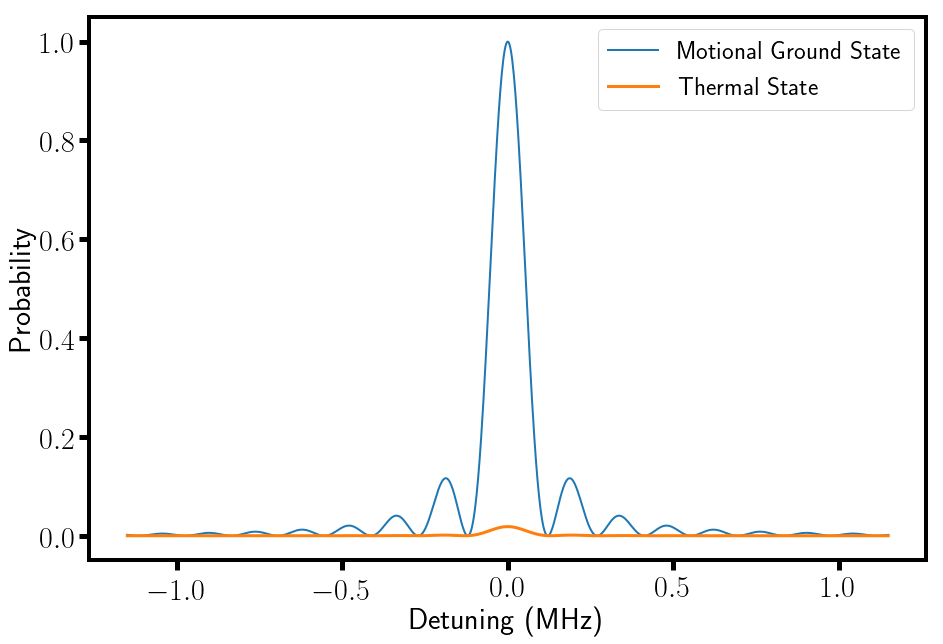

In [35]:
from scipy.special import assoc_laguerre as lag
from scipy.special import factorial
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

lam = 1762.e-9
hbar = 1.054e-34
k = 2*np.pi/lam
m = 133*1.66e-27
kb = 1.38e-23
omega_r = 2*np.pi*115e3
omega_z = 2*np.pi*80e3
gamma_493 = 2*np.pi*20e6
omega_rabi_0 = 2*np.pi*70.e3
n = np.linspace(0,500,501)

# phonon probabilities P_r grabbed from above

eta_r = k*np.sqrt(hbar/2/m/omega_r)

delta = np.linspace(-10*omega_r,10*omega_r,1001)
prob = np.zeros(len(delta))
m = 0
omega_rabi_c = np.exp(-1.*(eta_r**2)/2)*eta_r**m*lag(eta_r**2, n, m)*omega_rabi_0
tpi = np.pi/omega_rabi_c[0]
for i in range(len(delta)):
    prob[i] = np.sum(P_r[:501]*(omega_rabi_c**2/(omega_rabi_c**2 + delta[i]**2)*np.sin(np.sqrt(omega_rabi_c**2 + delta[i]**2)*tpi/2)**2))

prob_0 = omega_rabi_c[0]**2/(omega_rabi_c[0]**2 + delta**2)*np.sin(np.sqrt(omega_rabi_c[0]**2 + delta**2)*tpi/2)**2
plot(delta/np.pi/2/1e6,prob_0,linewidth = 2, label = 'Motional Ground State')
plot(delta/np.pi/2/1e6,prob,linewidth = 3, label = 'Thermal State')
legend(fontsize = 25)
tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlabel('Detuning (MHz)', fontsize = 30)
ylabel(r'Probability', fontsize = 30)
#ylim([0,.1])
show()

### Sideband Cooling Outside the Lamb-Dicke


Neutral people have successfully cooled to the near ground state outside of the Lamb-Dicke regime by removing multiple motional quanta per scattering event. This was done via Raman sideband cooling where the Lamb-Dicke parameter was approximately 0.3 and nbar after cooling was approximately 5. 

Standard sideband cooling in ions such as calcium drive the red sideband on the metastable transitiona and use a weak repump beam to increase the scattering rate. For us that repumper could be 493 nm or 614 nm. 

In [209]:
lam_614 = 614.e-9
hbar = 1.054e-34
k = 2*np.pi/lam_614
m = 133*1.66e-27
kb = 1.38e-23
omega_r = 2*np.pi*100e3
omega_z = omega_r/2.
gamma_493 = 2*np.pi*20e6

eta_r = k*np.sqrt(hbar/2/m/omega_r)
eta_z = k*np.sqrt(hbar/2/m/omega_z)

print r'Lamb-Dicke paramter radial :', '{:.3f}'.format(eta_r)
print r'Lamb-Dicke limit radial :', '{:.3f}'.format(eta_r**2*(2*nbar_r+1))

print r'Lamb-Dicke paramter axial :', '{:.3f}'.format(eta_z)
print r'Lamb-Dicke limit axial :', '{:.3f}'.format(eta_z**2*(2*nbar_z+1))

Lamb-Dicke paramter radial : 0.199
Lamb-Dicke limit radial : 641.400
Lamb-Dicke paramter axial : 0.282
Lamb-Dicke limit axial : 285.067


## Adding an a-parameter to change the secular frequency

$\Large \omega_\mathrm{s} = \beta\frac{\Omega_\mathrm{rf}}{2}$

with

$\Large \beta \approx \sqrt{a + \frac{q^2}{2}}$

The Mathiue $a$ and $q$ parameters for our 4-rod trap are given by:

$\Large a_x =  -\left(\frac{8eU_{\mathrm{EC}}}{m\omega_{\mathrm{rf}}^2z_0^2} -\frac{4eU_0}{m\omega_{\mathrm{rf}}^2r_0^2}\right)$

$\Large a_y = - \left(\frac{8eU_{\mathrm{EC}}}{m\omega_{\mathrm{rf}}^2z_0^2} + \frac{4eU_0}{m\omega_{\mathrm{rf}}^2r_0^2}\right)$

$\Large q_x = \frac{2eV_0}{m\omega_{\mathrm{rf}}^2r_0^2} = -q_y$

Since there is no RF applied in the z-direction, endcap voltages provide a static 1D harmonic osicllator trapping potential with secular frequency:

$\Large \omega_z = 2\sqrt{\frac{eU_{\mathrm{EC}}}{mz_0^2}}$

with $z_0$ a characteristic distance defining an ideal static quadrupole in 3D, with $r_0$ being the other characterstic distance. Since we've measured the axial secular frequency at a given endcap voltage, we can calculate $z_0$, and therefore estimate $a_x$ and $a_y$ to determine how much we expect our secular frequency to shift for a given DC voltage on the trap rods.

In [42]:
omega_rf = 2*np.pi*1.e6
U_dc = 20
U_ec = 50
r_0 = 3.0e-3
charge = 1.602e-19
m = 138*1.66e-27
V_rf = 200
omega_z = 2*np.pi*60.e3


# First calculate characteristic z0

z_0 = np.sqrt(charge*U_ec/m)*2/omega_z

print 'Characterstiz z :', '{:.2f}'.format(z_0*1e3), 'mm'

ax = -(8*charge*U_ec/m/omega_rf**2/z_0**2 - 4*charge*U_dc/m/omega_rf**2/r_0**2 )
ay = -(8*charge*U_ec/m/omega_rf**2/z_0**2 + 4*charge*U_dc/m/omega_rf**2/r_0**2 )
qx = 2*charge*V_rf/m/omega_rf**2/r_0**2

print 'ax :', '{:.3f}'.format(ax)
print 'ay :', '{:.3f}'.format(ay)
print 'qx :', '{:.3f}'.format(qx)

## Now we can calculate our secular frequencies
bx = np.sqrt(ax + qx**2/2)
by  = np.sqrt(ay + qx**2/2)

print 'beta x :', '{:.3f}'.format(bx)
print 'beta y :', '{:.3f}'.format(by)


omega_x = omega_rf*bx/2/2/np.pi
omega_y = omega_rf*by/2/2/np.pi

print 'omega x :', '{:.3f}'.format(omega_x*1e-3), 'kHz'
print 'omega y :', '{:.3f}'.format(omega_y*1e-3), 'kHz'

Characterstiz z : 31.37 mm
ax : 0.150
ay : -0.165
qx : 0.787
beta x : 0.678
beta y : 0.381
omega x : 339.178 kHz
omega y : 190.560 kHz
